<a href="https://colab.research.google.com/github/Shivani1351/Fake-News-Prediction/blob/main/Fake_News_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About the Dataset:

1. id: unique id for a news article
2. title: the title of a news article
3. author: author of the news article
4. text: the text of the article; could be incomplete
5. label: a label that marks whether the news article is real or fake:
           1: Fake news
           0: real News





Importing all the required libraries

In [ ]:
import numpy as np
import pandas as pd
import re #re - regular expressions
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn import svm #Support Vector Machines Classifier
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.naive_bayes import MultinomialNB #Mulinomial Naive Bayes
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier
from sklearn.metrics import accuracy_score

In [ ]:
import nltk #Natural Language Toolkit
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Pre-processing

In [ ]:
import dataclasses
# loading the dataset to a pandas DataFrame
data = pd.read_csv('dm_train.csv')

In [ ]:
data.shape

(20800, 5)

In [ ]:
data.head(15)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [ ]:
# print the first 5 rows of the dataframe
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
# missing values in the dataset
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
# replacing the null values with empty string
data = data.fillna('')

In [ ]:
# merging the author name and news title
data['content'] = data['author']+' '+data['title']

In [ ]:
print(data['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [ ]:
# separating the data & label
X = data.drop(columns='label', axis=1)
Y = data['label']

In [ ]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

Stemming:

Stemming is the process of reducing a word to its Root word

example:
actor, actress, acting --> act

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
data['content'] = data['content'].apply(stemming)

In [ ]:
print(data['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [ ]:
#separating the data and label
X = data['content'].values
Y = data['label'].values

In [ ]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [ ]:
print(Y)

[1 0 1 ... 0 1 1]


In [ ]:
Y.shape

(20800,)

In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

Splitting the dataset to training & test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

Training the Model: Logistic Regression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, Y_train)

LogisticRegression()

Evaluation of Logistic Regression

In [ ]:
# accuracy score on the training data
X_train_pred_lr = lr.predict(X_train)
lr_tr = accuracy_score(X_train_pred_lr, Y_train)

In [ ]:
print('Accuracy score of the training data using LR : ', lr_tr)

Accuracy score of the training data :  0.9865985576923076


In [ ]:
# accuracy score on the test data
X_test_pred_lr = lr.predict(X_test)
lr_test = accuracy_score(X_test_pred_lr, Y_test)

In [ ]:
print('Accuracy score of the test data using LR : ', lr_test)

Accuracy score of the test data :  0.9790865384615385


Making a Predictive System for Logistic Regression 

In [ ]:
X_new = X_test[3]

pred_lr = lr.predict(X_new)
print(pred_lr)

if (pred_lr[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [ ]:
print(Y_test[3])

0


Training the Model: Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

Evaluation of Decision Tree Classifier


In [ ]:
# accuracy score on the training data
X_train_pred_dt = dt.predict(X_train)
dt_tr = accuracy_score(X_train_pred_dt, Y_train)

In [ ]:
print('Accuracy score of the training data using DT : ', dt_tr)

Accuracy score of the training data using DT :  1.0


In [ ]:
# accuracy score on the test data
X_test_pred_dt = dt.predict(X_test)
dt_test = accuracy_score(X_test_pred_dt, Y_test)

In [ ]:
print('Accuracy score of the test data using DT : ', dt_test)

Accuracy score of the test data using DT :  0.9925480769230769


Making a Predictive System for Decision Tree Classifier

In [ ]:
X_new = X_test[3]

pred_dt = dt.predict(X_new)
print(pred_dt)

if (pred_dt[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [ ]:
print(Y_test[3])

0


Training the Model: Support Vector Machines

In [ ]:
svm = svm.SVC()

In [ ]:
svm.fit(X_train, Y_train)

SVC()

Evaluation of Support Vector Machines

In [ ]:
# accuracy score on the training data
X_train_pred_svm = svm.predict(X_train)
svm_tr = accuracy_score(X_train_pred_svm, Y_train)

In [ ]:
print('Accuracy score of the training data using SVM : ', svm_tr)

Accuracy score of the training data using SVM :  0.9990985576923077


In [ ]:
# accuracy score on the test data
X_test_pred_svm = dt.predict(X_test)
svm_test = accuracy_score(X_test_pred_svm, Y_test)

In [ ]:
print('Accuracy score of the test data using SVM : ', svm_test)

Accuracy score of the test data using SVM :  0.9925480769230769


Making a Predictive System for Support Vector Machines

In [ ]:
X_new = X_test[3]

pred_svm = svm.predict(X_new)
print(pred_svm)

if (pred_svm[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [ ]:
print(Y_test[3])

0


Training the Model: Multinomial Naive Bayes

In [ ]:
nb = MultinomialNB()

In [ ]:
nb.fit(X_train, Y_train)

MultinomialNB()

Evaluation of Multinomial Naive Bayes

In [ ]:
# accuracy score on the training data
X_train_pred_nb = nb.predict(X_train)
nb_tr = accuracy_score(X_train_pred_nb, Y_train)

In [ ]:
print('Accuracy score of the training data using Multinomial Naive Bayes : ', nb_tr)

Accuracy score of the training data using Multinomial Naive Bayes :  0.9782451923076924


In [ ]:
# accuracy score on the test data
X_test_pred_nb = nb.predict(X_test)
nb_test = accuracy_score(X_test_pred_nb, Y_test)

In [ ]:
print('Accuracy score of the test data using Mulyinomial Naive Bayes : ', nb_test)

Accuracy score of the test data using Mulyinomial Naive Bayes :  0.9550480769230769


Making a Predictive System for Multinomial Naive Bayes

In [ ]:
X_new = X_test[3]

pred_nb = nb.predict(X_new)
print(pred_nb)

if (pred_nb[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [ ]:
print(Y_test[3])

0


Training the Model: Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, Y_train)

RandomForestClassifier()

Evaluation of Random Forest Classifier

In [ ]:
# accuracy score on the training data
X_train_pred_rf = rf.predict(X_train)
rf_tr = accuracy_score(X_train_pred_rf, Y_train)

In [ ]:
print('Accuracy score of the training data using Random Forest Classifier : ', rf_tr)

Accuracy score of the training data using Random Forest Classifier :  1.0


In [ ]:
# accuracy score on the test data
X_test_pred_rf = rf.predict(X_test)
rf_test = accuracy_score(X_test_pred_rf, Y_test)

In [ ]:
print('Accuracy score of the test data using Random Forest Classifier : ', rf_test)

Accuracy score of the test data using Random Forest Classifier :  0.9939903846153846


Making a Predictive System for Random Forest Classifier

In [ ]:
X_new = X_test[3]

pred_rf = rf.predict(X_new)
print(pred_rf)

if (pred_rf[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [ ]:
print(Y_test[3])

0


Plot for comparison of the Training and Testing Accuracies of all the models

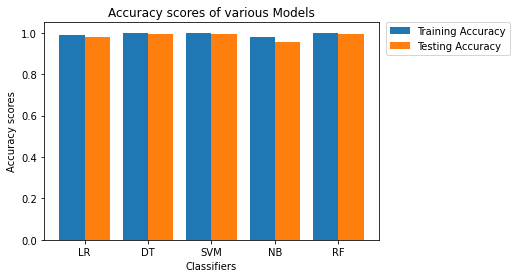

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['LR','DT','SVM','NB','RF']
train = [lr_tr,dt_tr,svm_tr,nb_tr,rf_tr]
test = [lr_test,dt_test,svm_test,nb_test,rf_test]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, train, 0.4,label='Training Accuracy')
plt.bar(X_axis + 0.2, test, 0.4,label='Testing Accuracy')

plt.xticks(X_axis, X)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy scores")
plt.title("Accuracy scores of various Models")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()